In [18]:
import sys
sys.path.append('..')
import os
import torch
from models.lstm import CVAE

import numpy as np
from utils import test_utils as tut
from utils import prob_utils as put
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Version 1

In [69]:
# Load model
z = 1
run = 0

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(z_dim=z, name=os.path.join(model_name), version='v1')
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders()

loaded from checkpoints/model=cvae_z=01_run=0000/model-20000.pt


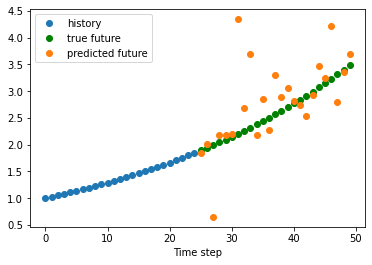

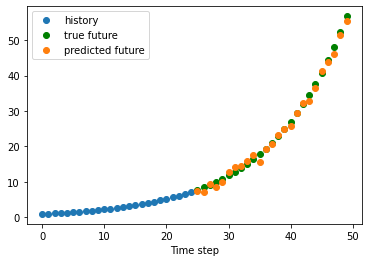

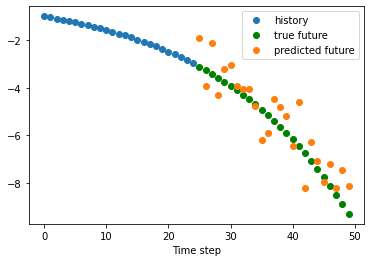

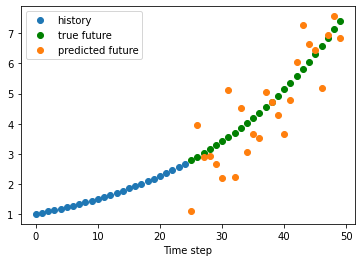

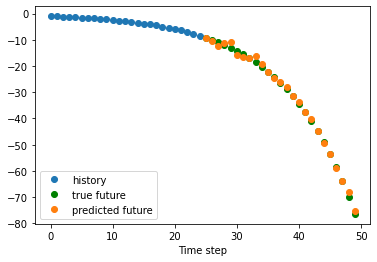

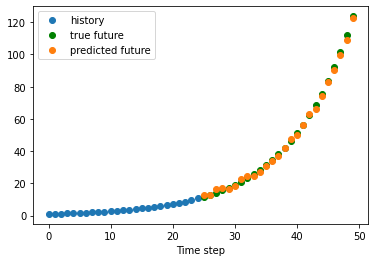

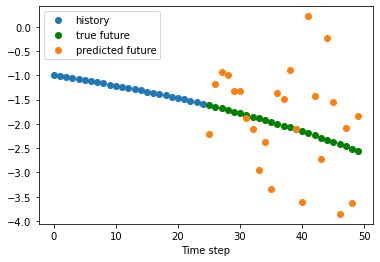

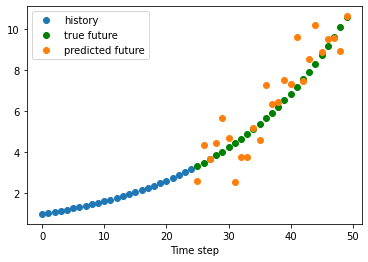

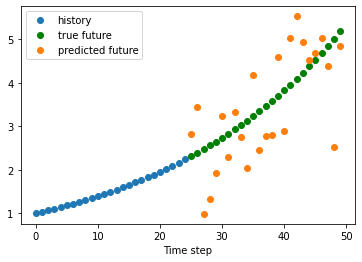

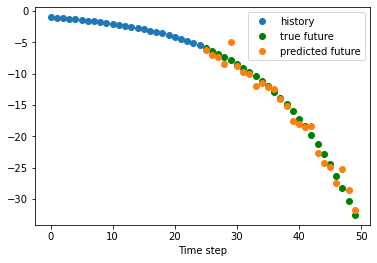

In [59]:
# Visualize some stuff
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(1) 
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x_hist, x, 'o', label='history')
    plt.plot(x_pred, y, 'o', color='green', label='true future')
    plt.plot(x_pred, y_pred, 'o', label='predicted future')
    plt.xlabel('Time step')
    plt.legend()
    

# Version 2: Discrete Latent Space

In [27]:
# Load model
z = 3
run = 1

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders()

loaded from checkpoints/model=cvae_z=03_run=0001/model-20000.pt


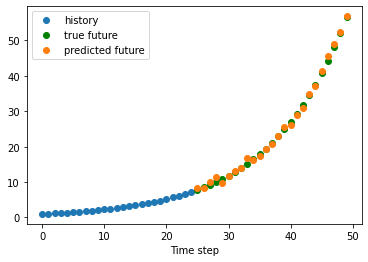

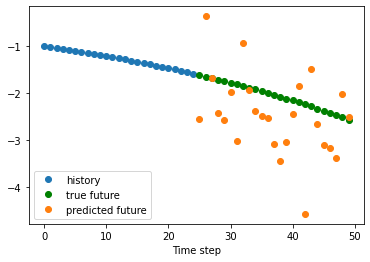

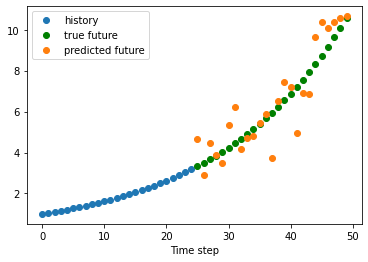

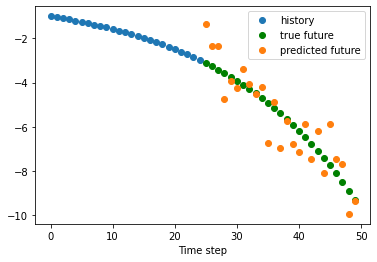

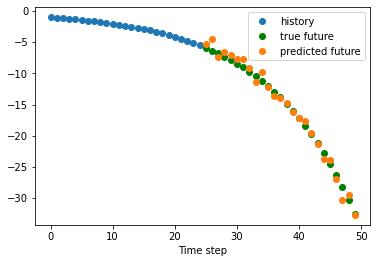

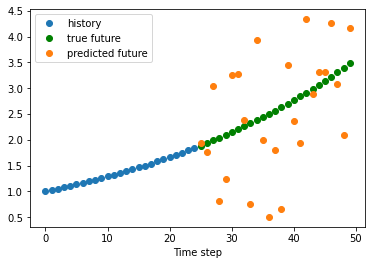

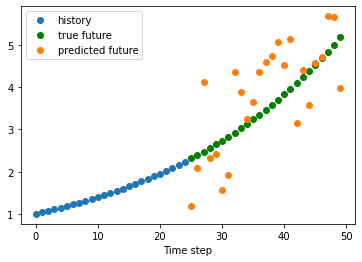

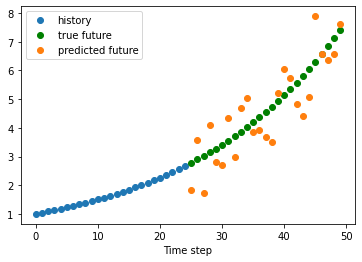

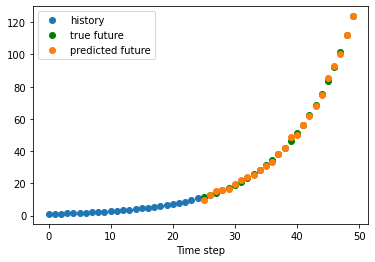

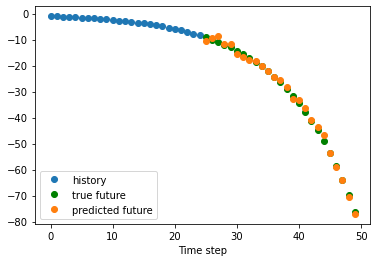

In [28]:
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(x)
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x_hist, x, 'o', label='history')
    plt.plot(x_pred, y, 'o', color='green', label='true future')
    plt.plot(x_pred, y_pred, 'o', label='predicted future')
    plt.xlabel('Time step')
    plt.legend()

## Version 3: 2D data

In [37]:
# Load model
z = 3
run = 2
h = 45

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(x_dim=h, y_dim=50-h, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fork', history_size=cvae.x_dim)

RuntimeError: Error(s) in loading state_dict for CVAE:
	Missing key(s) in state_dict: "enc.x_rnn.weight_ih_l0", "enc.x_rnn.weight_hh_l0", "enc.x_rnn.bias_ih_l0", "enc.x_rnn.bias_hh_l0", "enc.y_rnn.weight_ih_l0", "enc.y_rnn.weight_hh_l0", "enc.y_rnn.bias_ih_l0", "enc.y_rnn.bias_hh_l0", "enc.xz_proj_network.weight", "enc.xz_proj_network.bias", "enc.xyz_proj_network.weight", "enc.xyz_proj_network.bias", "dec.rnn_network.weight_ih_l0", "dec.rnn_network.weight_hh_l0", "dec.rnn_network.bias_ih_l0", "dec.rnn_network.bias_hh_l0", "dec.proj_network.weight", "dec.proj_network.bias", "dec.projout_network.weight", "dec.projout_network.bias". 
	Unexpected key(s) in state_dict: "enc.xy_model.0.weight", "enc.xy_model.0.bias", "enc.xy_model.2.weight", "enc.xy_model.2.bias", "enc.xy_model.4.weight", "enc.xy_model.4.bias", "enc.xy_model.6.weight", "enc.xy_model.6.bias", "enc.x_model.0.weight", "enc.x_model.0.bias", "enc.x_model.2.weight", "enc.x_model.2.bias", "enc.x_model.4.weight", "enc.x_model.4.bias", "enc.x_model.6.weight", "enc.x_model.6.bias", "dec.model.0.weight", "dec.model.0.bias", "dec.model.2.weight", "dec.model.2.bias", "dec.model.4.weight", "dec.model.4.bias", "dec.model.6.weight", "dec.model.6.bias". 

In [38]:
for i, (x, y) in enumerate(valid_loader):
    batch = len(x)
    z = cvae.sample_z(x)
    y_pred = cvae.sample_y_given(x, z)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o')
    plt.plot(y[:, 0], y[:, 1], 'o')
    plt.plot(y_pred[:, 0], y_pred[:, 1], 'o')
    plt.axis('equal')
    
    if i > 10:
        break
#     plt.figure()
#     plt.plot(x_hist, x, 'o', label='history')
#     plt.plot(x_pred, y, 'o', color='green', label='true future')
#     plt.plot(x_pred, y_pred, 'o', label='predicted future')
#     plt.xlabel('Time step')
#     plt.legend()

RuntimeError: input.size(-1) must be equal to input_size. Expected 45, got 2

## Version 4

In [41]:
# Load model
z = 3
run = 3
h = 45

layout = [
    ('model={:s}', 'cvae'),
    ('z={:02d}', z),
    ('run={:04d}', run)
]

model_name = '_'.join([t.format(v) for (t, v) in layout])

cvae = CVAE(x_dim=2, y_dim=2, z_dim=z, name=os.path.join(model_name))
tut.load_model_by_name(cvae, global_step=20000)

# Load data
train_loader, valid_loader = put.get_data_loaders('fork')

loaded from checkpoints/model=cvae_z=03_run=0003/model-20000.pt


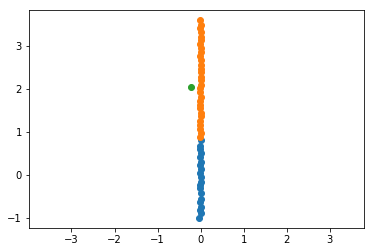

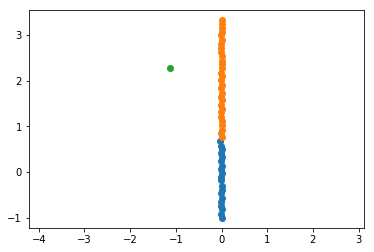

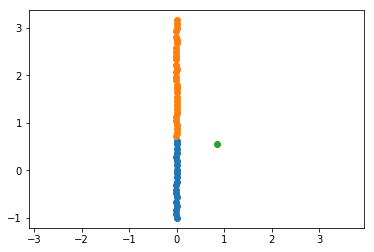

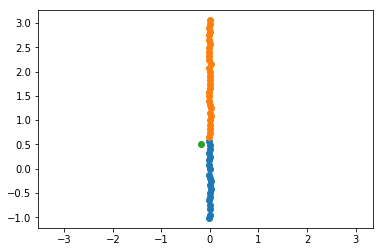

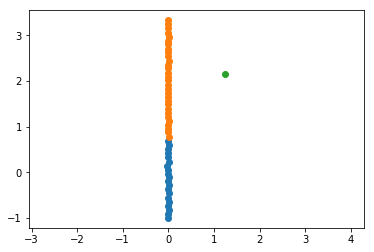

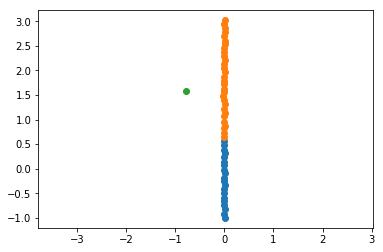

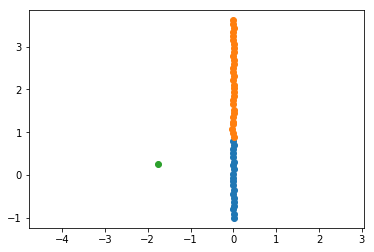

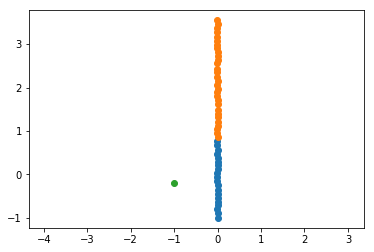

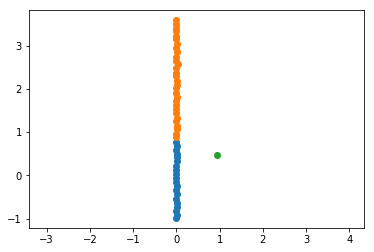

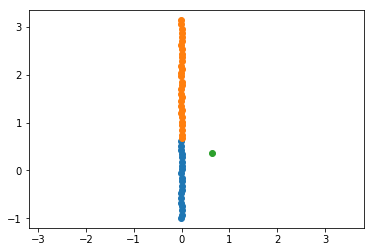

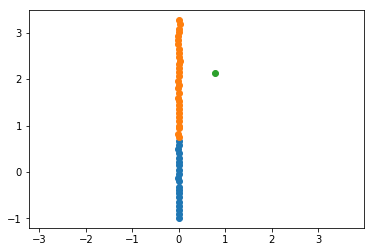

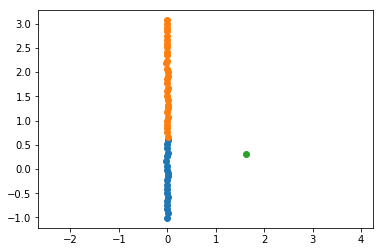

In [43]:
for i, (x, y) in enumerate(valid_loader):
    y_pred = cvae.sample_y(x)
    
    x = x[0]
    y = y[0]
    y_pred = y_pred[0]
    y_pred = np.reshape(y_pred, (-1, 2))
    x_hist = range(0, len(x))
    x_pred = range(len(x), len(x) + len(y))
    
    plt.figure()
    plt.plot(x[:, 0], x[:, 1], 'o')
    plt.plot(y[:, 0], y[:, 1], 'o')
    plt.plot(y_pred[:, 0], y_pred[:,1], 'o')
    plt.axis('equal')
    
    if i > 10:
        break
#     plt.figure()
#     plt.plot(x_hist, x, 'o', label='history')
#     plt.plot(x_pred, y, 'o', color='green', label='true future')
#     plt.plot(x_pred, y_pred, 'o', label='predicted future')
#     plt.xlabel('Time step')
#     plt.legend()